#**23dec**#

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Topmentor/iphone_purchase_records.csv")
print(data.head(2))

  Gender  Age  Salary  Purchase Iphone
0   Male   19   19000                0
1   Male   35   20000                0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
/content/drive/MyDrive/Topmentor/iphone_purchase_records.csv

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
Salary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchase Iphone,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [9]:
data.isnull().sum()

,0
Gender,0
Age,0
Salary,0
Purchase Iphone,0


In [10]:
data.isnull().sum()[data.isnull().sum()>0]

,0


In [11]:
data.dtypes

,0
Gender,object
Age,int64
Salary,int64
Purchase Iphone,int64


In [12]:
data.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
label_encoder = LabelEncoder()

In [91]:
print(label_encoder)

LabelEncoder()


In [92]:
data['Gender'] = label_encoder.fit_transform(data['Gender'])

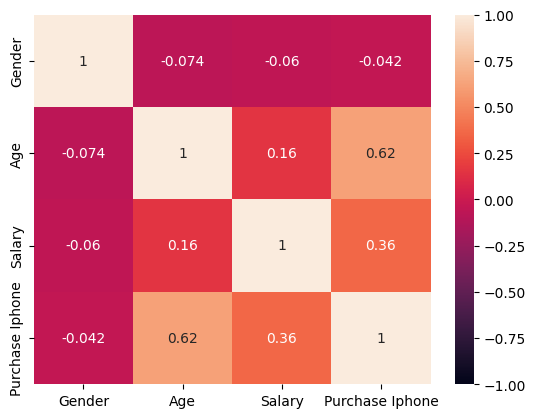

In [93]:
sns.heatmap(data.corr(),vmin= -1, annot = True)
plt.show()

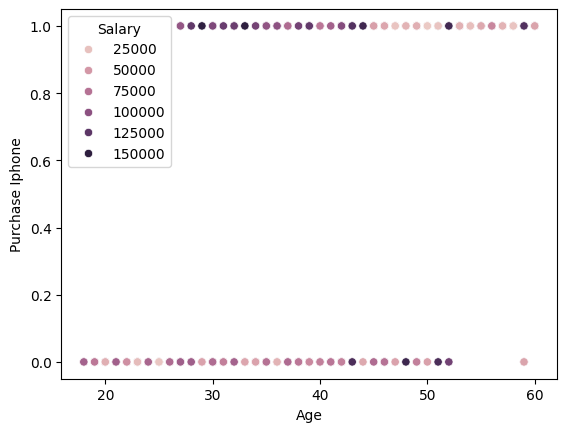

In [95]:
sns.scatterplot(x = data["Age"], y = data["Purchase Iphone"], hue = data["Salary"])
plt.show()

In [13]:
#### KNN REGRESSION
y = data['Purchase Iphone']
x = data[['Age', 'Salary']]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=123)

In [19]:
y_test.shape

(80,)

In [20]:
y_train.shape

(320,)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


In [22]:
model = KNeighborsRegressor(n_neighbors=5)
print("The model is loaded")

The model is loaded


In [23]:
model_fitting = model.fit(x_train, y_train)
print ('Model Training is completed')

Model Training is completed


In [24]:
 round(model_fitting.score(x_train, y_train),2)

0.59

In [25]:
pred = model_fitting.predict(x_test)
results = r2_score(y_test,pred)
print(results)

0.2746666666666666


In [26]:
data.shape

(400, 4)

In [ ]:
import math
math.sqrt(320)

17.88854381999832

In [44]:
error = []
k= []
for i in range(1,10,2):
  model = KNeighborsRegressor(n_neighbors=i)
  model_fit = model.fit(x_train,y_train)
  err = 1 - round(model_fit.score(x_train,y_train),2)
  error.append(err)
  k.append(i)

In [45]:
pd.DataFrame({'k':k, 'error':error})

,k,error
0,1,0.00
1,3,0.30
2,5,0.41
3,7,0.44
4,9,0.49


In [46]:
import joblib

In [47]:
joblib.dump(model,'iphone_purchase_records.csv')

['iphone_purchase_records.csv']

In [48]:
file_name = 'iphone_purchase_records.csv'
sav_model = joblib.load('iphone_purchase_records.csv')

In [49]:
x_test

,Age,Salary
234,38,112000
42,35,108000
303,37,79000
155,31,15000
342,38,65000
...,...,...
179,31,34000
202,39,134000
323,48,30000
114,42,80000


In [51]:
Age = [28,29]
Salary =[28000,29000]
raw_data = pd.DataFrame({'Age':Age, "Salary":Salary})
raw_data

,Age,Salary
0,28,28000
1,29,29000


In [52]:
sav_model.predict(raw_data)

array([0.44444444, 0.55555556])

In [55]:
url = ("/content/drive/MyDrive/Topmentor/iphone_purchase_records.csv")
std = pd.read_csv(url)
std

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [56]:
x = std[[	'Age', 'Salary']]
y = std['Purchase Iphone']

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
model_clf = KNeighborsClassifier(n_neighbors=5)
model_clf_train = model_clf.fit(x_train, y_train)
pred = model_clf_train.predict(x_test)

In [60]:
model_clf_train.score(x_train, y_train)

0.878125

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,pred)

0.725

In [64]:
x_test['Actual'] = y_test

In [66]:
x_test['pred'] = pred

In [67]:
x_test

,Age,Salary,Actual,pred
29,31,18000,0,0
300,58,38000,1,0
23,45,22000,1,0
372,39,73000,0,0
79,26,17000,0,0
...,...,...,...,...
52,29,83000,0,0
273,39,106000,1,1
292,55,39000,1,0
275,57,74000,1,0


In [84]:
error = []
k= []
for i in range(1,10,2):
    model_clf = KNeighborsClassifier(n_neighbors=5)
    model_clf_train = model_clf.fit(x_train, y_train)
    pred1 = model_clf_train.predict(x_test)
    err = 1 - round(accuracy_score(y_test,pred),2)
    err = 1 - round(model_clf.score(x_train,y_train),2) # This line was incorrectly indented
    error.append(err)
    k.append(i)

In [86]:
error

[0.14, 0.14, 0.14, 0.14, 0.14]

In [87]:
k

[1, 3, 5, 7, 9]